In [12]:
import torch
from  torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
collated_folder = "/media/benp/NVMEspare/datasets/full_WMH_Chal_dataset/preprocessed/collated/"

In [14]:
domains = os.listdir(collated_folder)

In [15]:
domains

['Amsterdam_GE1T5_test.npz',
 'Amsterdam_GE3T_test.npz',
 'Amsterdam_GE3T_training.npz',
 'Amsterdam_Philips_VU_PETMR_01_test.npz',
 'Singapore_test.npz',
 'Singapore_training.npz',
 'Utrecht_test.npz',
 'Utrecht_training.npz']

In [16]:
result = np.load(collated_folder + domains[0])

In [17]:
collated_folder + domains[0]

'/media/benp/NVMEspare/datasets/full_WMH_Chal_dataset/preprocessed/collated/Amsterdam_GE1T5_test.npz'

In [18]:
list(result.keys())

['args', 'kwds']

In [19]:
result['kwds'][0]

'test_Amsterdam_GE1T5_150'

In [20]:
args = result['args']

In [21]:
args.shape

(10, 4, 192, 224, 64)

In [22]:
args[0][0:3].shape

(3, 192, 224, 64)

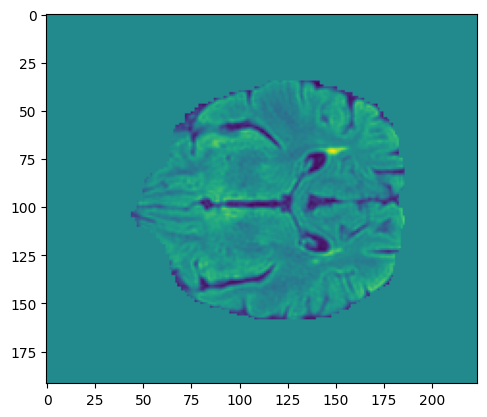

In [23]:
plt.imshow(args[0][0][:,:,32])

In [24]:
%load_ext autoreload
%autoreload 1

In [48]:
%autoreload

In [49]:
from ulw_data.torch_dataset.challenge_dataset_3D import load_3D_wmh_chal, WMH_Challenge_Dataset_3D

In [50]:
# for domain in domains:
#     path = collated_folder + domain
#     print(path)

#     try:
#         loaded_ds = WMH_Challenge_Dataset_3D(path)
#     except:
#         print(f"failed for: {domain}")

In [51]:
train_ds = load_3D_wmh_chal(collated_folder, train=True, combine=True)

In [52]:
len(train_ds)

60

In [53]:
train_ds[0][0][0].shape

torch.Size([192, 224, 64])

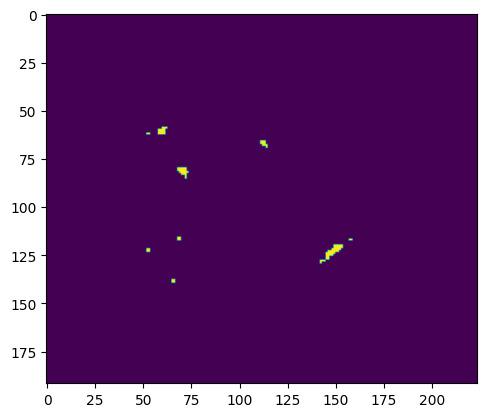

In [54]:
plt.imshow(train_ds[0][1][:,:,32])

In [57]:
train_ds[0][2]

'training_Amsterdam_GE3T_100'

In [59]:
wheres = torch.where(train_ds[0][1])
(wheres[0].min(), wheres[0].max()), (wheres[1].min(), wheres[1].max()), (wheres[2].min(), wheres[2].max())

((tensor(41), tensor(145)),
 (tensor(46), tensor(177)),
 (tensor(26), tensor(50)))

In [60]:
wheres = torch.where(train_ds[0][0][2])
(wheres[0].min(), wheres[0].max()), (wheres[1].min(), wheres[1].max()), (wheres[2].min(), wheres[2].max())

((tensor(28), tensor(162)),
 (tensor(30), tensor(192)),
 (tensor(11), tensor(51)))

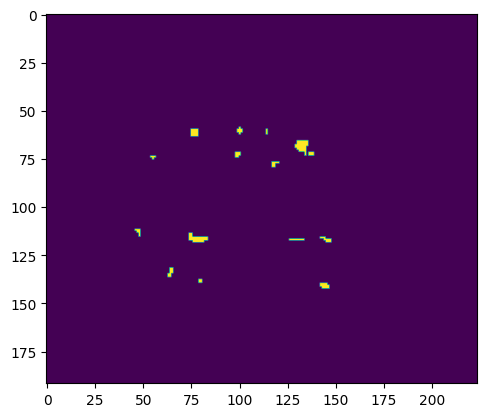

In [69]:
plt.imshow(train_ds[0][1][:,:,38])

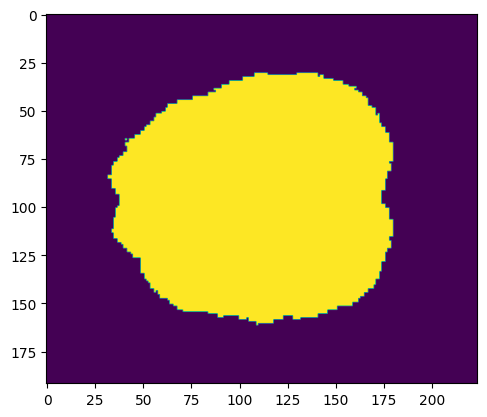

In [72]:
plt.imshow(train_ds[0][0][2,:,:,38])

In [74]:
from torch import where

In [75]:
where(train_ds[0][0][2])

(tensor([ 28,  28,  28,  ..., 162, 162, 162]),
 tensor([118, 118, 119,  ..., 134, 134, 135]),
 tensor([30, 34, 30,  ..., 28, 29, 29]))

In [76]:
torch.arange(0, 10, 1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [83]:
slice_range = range(3, 10+1)

In [84]:
list(zip([2 for _ in slice_range], slice_range))

[(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10)]

In [87]:
train_ds[9][1].shape

torch.Size([192, 224, 64])

In [ ]:
# I need to see if there are any class 2 examples in the train data and ignore them for now I guess.

# Lets see how I get on....

In [108]:
%autoreload

In [26]:
from ulw_data.torch_dataset.challenge_data_pipeline import train_data_pipeline_2D
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_ds, val_ds = train_data_pipeline_2D(collated_folder, val_proportion=0.15, seed=5, transforms=None)

In [6]:
len(train_ds)

2171

In [7]:
len(val_ds) # noice. I love it. yeeety boi.

374

In [ ]:
# I do quite liek my intensity mapping idea, but it is a secondary point I think.
# I also like my (align every brain to a single brain or to an atlas idea that is quite nice as well

training_Singapore_67_11
training_Singapore_67_12
training_Singapore_67_13
training_Singapore_67_14
training_Singapore_67_15
training_Singapore_67_16
training_Singapore_67_17
training_Singapore_67_18
training_Singapore_67_19
training_Singapore_67_20


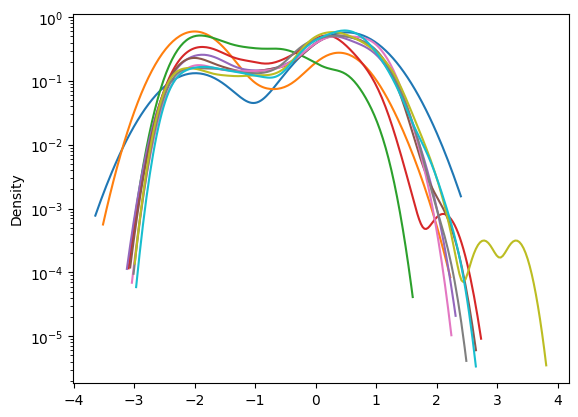

In [36]:
count = 1
for (x, y), uid in val_ds:
    if 'Singapore' in uid:
        print(uid)
        flair = x[0].view((-1,))
        flair = flair[flair != 0]
        #plt.hist(flair, 50, density=True, histtype='step')
        sns.kdeplot(flair)
        # plt.xscale('log')
        plt.yscale('log')
    
        if count == 10:
            break
        count += 1

In [117]:
train_ds[1][0][0].shape

torch.Size([3, 192, 224])

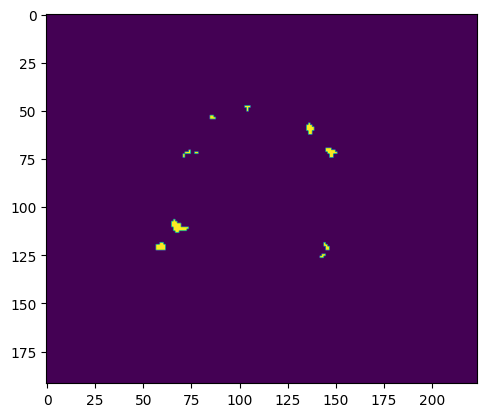

In [126]:
plt.imshow(train_ds[23][0][1])

In [ ]:
### adding a MONAI augmentation pipeline?

# training a basic monai model with a monai trainer?